In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import collections

In [7]:
def HoughLineDetector(img, angle_num, distantce_num):
    width, height = img.shape[:2]
    print(height, width)
    
    dist = np.sqrt(np.square(height) + np.square(width))
    
    angles = np.arange(0, 180, 180 / angle_num)
    
    distances = np.arange(-dist, dist, (2 * dist) / distantce_num)
    
    angel_cos = np.cos(np.deg2rad(angles))
    angel_sin = np.sin(np.deg2rad(angles))
    
    accumulator = np.zeros((distantce_num, angle_num), dtype=float)
    print(accumulator.shape)
    
    points = collections.defaultdict(list)
    
#     points = np.full((*accumulator.shape), dtype=object)  
#     print(points.shape)
    
    for x in range(0, width):
        for y in range(0, height):
            if img[x, y] != 0:
                for angle_ind in range(0, angle_num):
                    cur_distance = (x - width / 2) * angel_cos[angle_ind] + (y - height / 2) * angel_sin[angle_ind]
                    distance_ind = (np.abs(distances - cur_distance)).argmin()
                    accumulator[distance_ind, angle_ind] += 1
                    points[distance_ind, angle_ind].append((x, y))
                    
    return accumulator, points
    

In [106]:
def HoughCircleDetector(img, angle_num, distance_num):
    width, height = img.shape[:2]
    print(height, width)
    
    dist = np.sqrt(np.square(height) + np.square(width))
    
    angles = np.arange(0, 360, 360 / angle_num)
    
    distances = np.arange(0, dist,  dist / distance_num)
    
    angle_cos = np.cos(np.deg2rad(angles))
    angle_sin = np.sin(np.deg2rad(angles))
    
    accumulator = np.zeros((distance_num, width, height), dtype=float)
    print(accumulator.shape)
    print(distances.shape)
    for x in range(0, width):
        for y in range(0, height):
            if img[x, y] != 0:
                for cur_distance in range(0, distance_num):
                    for cur_angel in range(0, angle_num):
                        cur_x = x - distances[cur_distance] * angle_cos[cur_angel]
                        cur_y = y - distances[cur_distance] * angle_sin[cur_angel]
                        if x != cur_x and y != cur_y:
                            if 0 <= int(cur_x) < width and 0 <= int(cur_y) < height:
                                accumulator[cur_distance, int(cur_x), int(cur_y)] += 1
            
    return accumulator, distances


In [107]:
img1 = cv.imread('test1.png', cv.IMREAD_GRAYSCALE)

result1 = HoughCircleDetector(img1, 360, 100)

425 330
(100, 330, 425)
(100,)


In [8]:
img = cv.imread('test.png', cv.IMREAD_GRAYSCALE)

result, points = HoughLineDetector(img, 180, 50)

425 330
(50, 180)


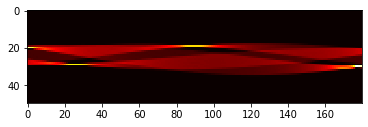

In [119]:
plt.imshow(result, cmap='hot', interpolation='nearest')
plt.show()

In [93]:
np.unravel_index(np.argmax(result1[0]), result1[0].shape)
# result1[0, 80, 141]

(5, 106, 144)

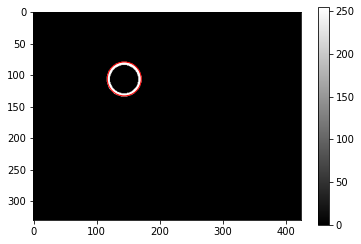

In [118]:
plt.imshow(img1, cmap='gray')
plt.colorbar()


circle = plt.Circle((144, 106), result1[1][5], fill=False, color='red')
plt.gca().add_artist(circle)
